In [1]:
import pickle
import numpy as np  # Ensure numpy is imported to handle arrays

# Load the mpc solutions from the pickle file
with open('mpc_solutions.pkl', 'rb') as f:
    mpc_solutions = pickle.load(f)

# Assuming mpc_solutions is a numpy array or can be converted into one
if not isinstance(mpc_solutions, np.ndarray):
    mpc_solutions = np.array(mpc_solutions)

mpc_solutions = mpc_solutions.round(1)

# Check the shape of the array
print("Shape of mpc_solutions array:", mpc_solutions.shape)

# map elements from [-0.1, 0, 0.1] to [1,2,3]

# Define the mapping function
def map_elements(x):
    if x == -0.1:
        return 0
    elif x == 0:
        return 1
    elif x == 0.1:
        return 2
    else:
        return x

# Apply the mapping function to the array
mapped_mpc_solutions = np.vectorize(map_elements)(mpc_solutions)
mapped_mpc_solutions

Shape of mpc_solutions array: (720,)


array([2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 0, 1, 0,

In [1]:
# Import necessary libraries
import os
import gym
from environments.energy_management_env import EnergyManagementEnv

# Import the Agent class from your code


# Import environment registration function
from environments.env_registration import register_env

# Define environment parameters
env_params = {
    'SOC_min': 0.2,
    'SOC_max': 0.8,
    'E': 5000,
    'lambda_val': 0.1,
    'data_path': 'data/Data_input.csv',
    'initial_SOC': 0.5  # Set to None if not using an initial_SOC
}

# Register the custom environment
register_env('EnergyManagement-v0', 'environments.env_registration:environment_creator',{'environment_class': EnergyManagementEnv, **env_params})

from rl_monitoring_utils.vectorized_env_wrapper import VectorizedEnvWrapper
from policies.categorical_policy import CategoricalPolicy
from learning_utils.value_estimator import ValueEstimator
from agents.a2c import A2C
from agents.a2c_warm_start import A2C_WarmStart
from agents.ppo import PPO
from agents.reinforce import REINFORCE
import gym


energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=8)

# categorical = CategoricalPolicy(energy_management, lr=1e-2)
# value_estimator = ValueEstimator(energy_management, lr=1e-2)
# a2c_agent, totals_a2c = A2C(energy_management, categorical, value_estimator, epochs=1000, gamma = 1, T = 720)

# energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
# energy_management.test_agent(a2c_agent)

In [2]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10, x = 5)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

NameError: name 'mapped_mpc_solutions' is not defined

In [ ]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10, x = 10)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

In [ ]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10, x = 10)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-161682.3659133494

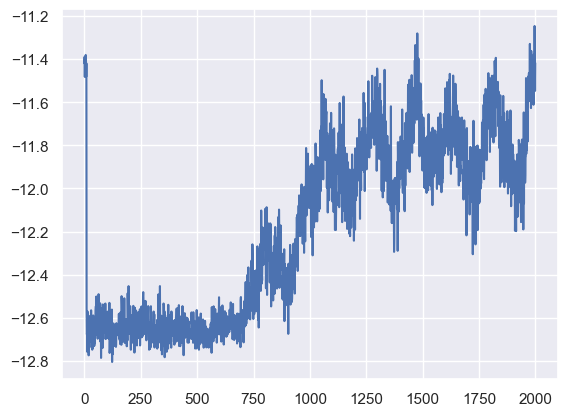

In [4]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-174293.7159583494

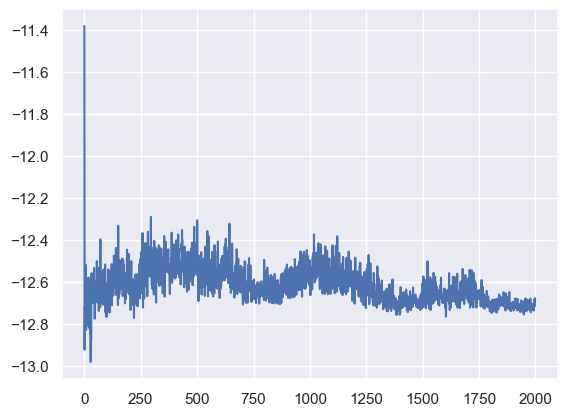

In [10]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=1)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-174920.96596334942

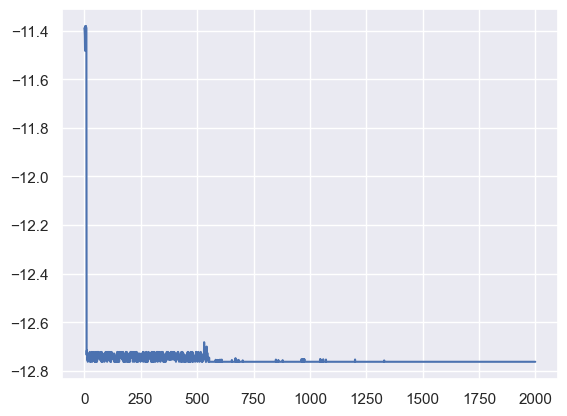

In [5]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[64, 32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-174920.96596334942

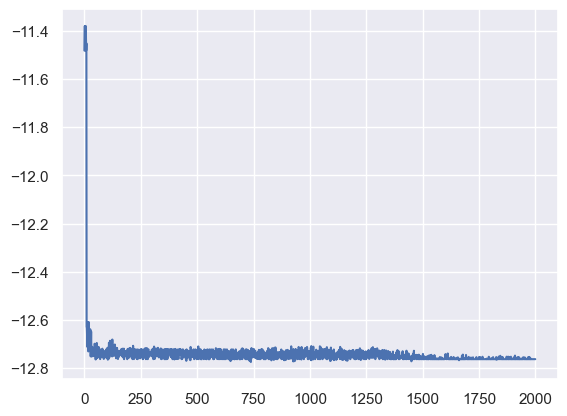

In [6]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[32])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=10)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-174536.4659583494

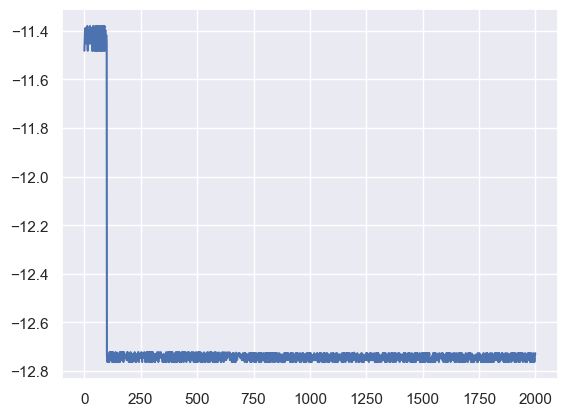

In [7]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[16])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=100)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-174507.76597834943

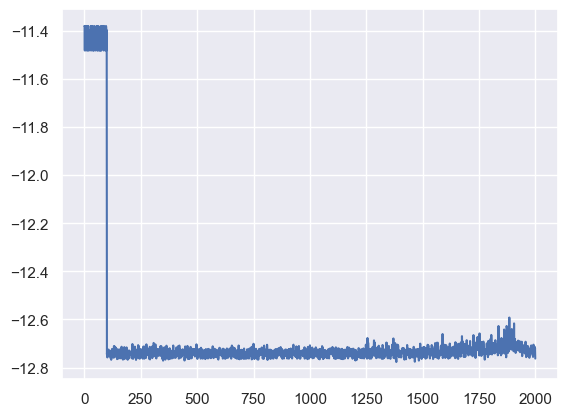

In [8]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=100)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)

-170295.6660283494

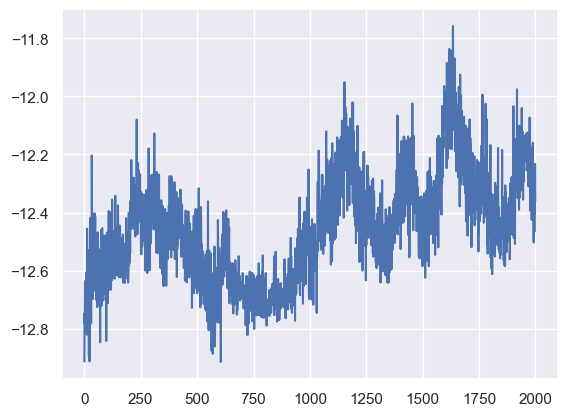

In [9]:
categorical = CategoricalPolicy(energy_management, lr=1e-2, hidden_sizes=[])
value_estimator = ValueEstimator(energy_management, lr=1e-2)
a2c_warm_start_agent, totals_a2c = A2C_WarmStart(energy_management, categorical, value_estimator, mapped_mpc_solutions, epochs=2000, gamma = 1, T = 720, warm_start_epochs=0)

energy_management = VectorizedEnvWrapper(gym.make("EnergyManagement-v0"), num_envs=1)
energy_management.test_agent(a2c_warm_start_agent)